# Import modules needed

In [1]:
%%time
import sys
sys.path.append('..')

Wall time: 0 ns


In [3]:
%%time
from source.code.data_downloader import DataDownloader
from source.code.custom_tokenizer import CustomTokenizer
from source.code.word_to_vec_transformer import WordToVecTransformer
from source.code.doc_to_vec_transformer import Doc2VecTransformer
from source.code.metrics import metrics_report
from source.code.visualization import choose_n_clusters

Wall time: 0 ns


In [4]:
%%time
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import LatentDirichletAllocation as LDA

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

Wall time: 196 ms


Fix one random state across all notebook cells

In [5]:
%%time
random_state = 0

Wall time: 0 ns


# Read data

In [6]:
%%time
data_downloader = DataDownloader('../data/datasets/')


INITIALIZING...
INITIALIZATION HAS BEEN COMPLETED


Wall time: 6 ms


In [7]:
%%time
documents, labels_true = data_downloader.extract_documents(docs_count_per_topic=200)

Files reading and documents extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 23.86it/s]


Wall time: 868 ms


# TF-IDF documents representation

In [8]:
%%time
pipeline = Pipeline([
    ('tokenize', CustomTokenizer()),
    ('vectorize', CountVectorizer()),
    ('inverse', TfidfTransformer(smooth_idf=True))
])

Wall time: 500 µs


In [9]:
%%time
tf_idf_documents = pipeline.fit_transform(documents)

Documents tokenization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:26<00:00, 150.86it/s]


Wall time: 27.1 s


In [10]:
%%time
tf_idf_documents.shape

Wall time: 0 ns


(4000, 19634)

# LDA documents representation

In [11]:
%%time
pipeline = Pipeline([
    ('tokenize', CustomTokenizer()),
    ('vectorize', CountVectorizer()),
    ('lda', LDA(n_components=100, random_state=random_state, verbose=10, learning_method='batch', n_jobs=-1))
])

Wall time: 2 ms


In [12]:
%%time
lda_documents = pipeline.fit_transform(documents)

Documents tokenization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:11<00:00, 340.26it/s]
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    5.5s remaining:    9.3s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    6.1s remaining:    3.6s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    6.2s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.4s finished


iteration: 1 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.1s remaining:    6.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    2.3s remaining:    3.8s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.6s remaining:    1.5s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    3.0s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.1s finished


iteration: 2 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.6s remaining:    4.9s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.6s remaining:    2.8s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.0s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.4s finished


iteration: 3 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.8s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.7s remaining:    2.8s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.0s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.4s finished


iteration: 4 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.4s remaining:    4.4s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.5s remaining:    2.6s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.8s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s finished


iteration: 5 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.7s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.6s remaining:    2.7s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.2s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.3s finished


iteration: 6 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.5s remaining:    2.6s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s finished


iteration: 7 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.5s remaining:    2.6s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.1s finished


iteration: 8 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.3s remaining:    4.1s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.4s remaining:    2.4s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.6s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.0s finished


iteration: 9 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.4s remaining:    4.5s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.5s remaining:    2.6s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.8s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.6s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.8s remaining:    3.1s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.2s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.5s remaining:    4.7s
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.8s remaining:    3.1s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    2.2s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapse

Wall time: 50.1 s


In [13]:
%%time
lda_documents.shape

Wall time: 0 ns


(4000, 100)

# Word2Vec representation

In [14]:
%%time
pipeline = Pipeline([
    ('tokenize', CustomTokenizer()),
    ('w2v', WordToVecTransformer(100))
])

Wall time: 4.99 ms


In [15]:
%%time
w2v_documents = pipeline.fit_transform(documents)

Documents tokenization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:10<00:00, 378.12it/s]


Wall time: 13.3 s


In [16]:
%%time
w2v_documents.shape

Wall time: 0 ns


(4000, 100)

# K-Means Clustering with known clusters count

## TF-IDF

In [17]:
%%time
kmeans = KMeans(n_clusters=20, random_state=random_state)

Wall time: 0 ns


In [18]:
%%time
labels_tf_idf_pred = kmeans.fit_predict(tf_idf_documents)

Wall time: 36.2 s


## LDA

In [19]:
%%time
kmeans = KMeans(n_clusters=20, random_state=random_state)

Wall time: 501 µs


In [20]:
%%time
labels_lda_pred = kmeans.fit_predict(lda_documents)

Wall time: 539 ms


## W2V

In [21]:
%%time
kmeans = KMeans(n_clusters=20, random_state=random_state)

Wall time: 0 ns


In [22]:
%%time
labels_w2v_pred = kmeans.fit_predict(w2v_documents)

Wall time: 799 ms


# Metrics calculation

### Confusion matrix

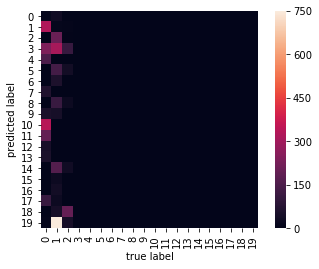

Wall time: 265 ms


In [23]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_tf_idf_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

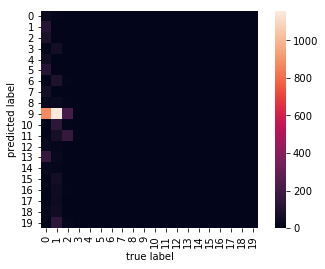

Wall time: 240 ms


In [24]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_lda_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

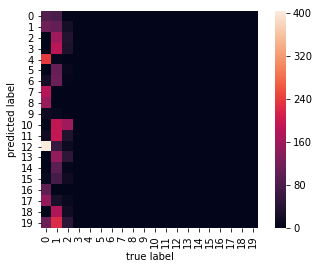

Wall time: 240 ms


In [25]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_w2v_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Other metrics (with/without ground-truth labels)

In [26]:
metrcs = metrics_report(
    ['kmeans_tf_idf', 'kmeans_lda', 'kmeans_w2v'],
    [tf_idf_documents.toarray(), lda_documents, w2v_documents],
    [labels_tf_idf_pred, labels_lda_pred, labels_w2v_pred],
    labels_true
)

In [27]:
metrcs

,AR,MI,AMI,NMI,SC,CHI
kmeans_tf_idf,0.154784,0.591418,0.226318,0.373809,0.019803,13.563415
kmeans_lda,0.042953,0.255770,0.131473,0.188322,0.123889,74.979496
kmeans_w2v,0.076012,0.452327,0.156421,0.272140,0.125356,383.671749


# K-Means Clustering without known clusters count

## TF-IDF

In [28]:
n_clusters = [15, 20, 25, 30]

For n_clusters = 15 The average silhouette_score is : 0.0160876989931
For n_clusters = 15 The standard deviation of silhouette_score is : 0.0327386922598
For n_clusters = 15 The min value of silhouette_score is : -0.0422301289268
For n_clusters = 15 The max value of silhouette_score is : 0.249136170607


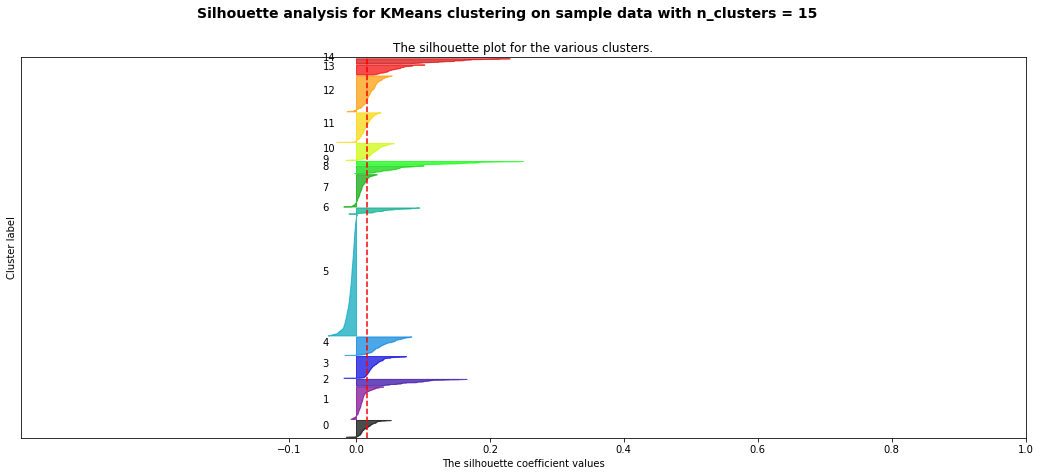

For n_clusters = 20 The average silhouette_score is : 0.0198027062466
For n_clusters = 20 The standard deviation of silhouette_score is : 0.0466522329701
For n_clusters = 20 The min value of silhouette_score is : -0.0926186970826
For n_clusters = 20 The max value of silhouette_score is : 0.482215535719


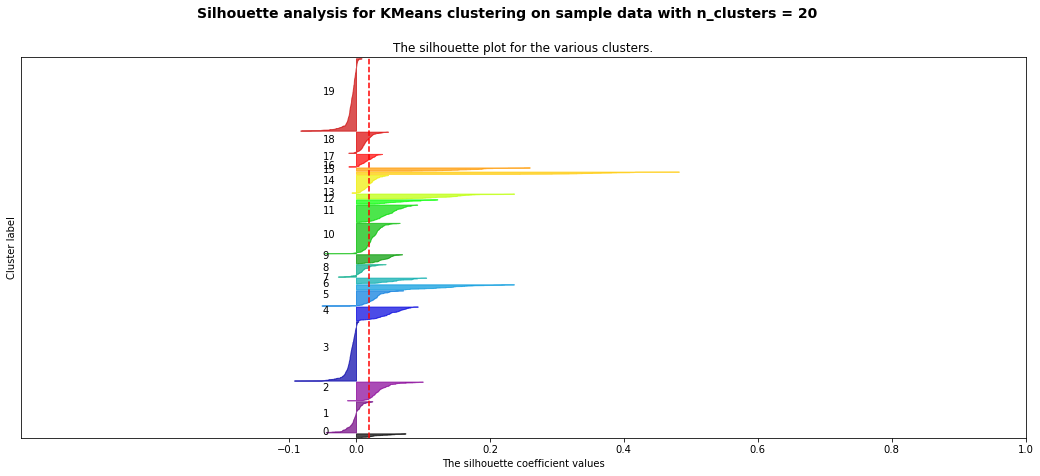

For n_clusters = 25 The average silhouette_score is : 0.0222929504354
For n_clusters = 25 The standard deviation of silhouette_score is : 0.045948380066
For n_clusters = 25 The min value of silhouette_score is : -0.0936980572079
For n_clusters = 25 The max value of silhouette_score is : 0.47832836041


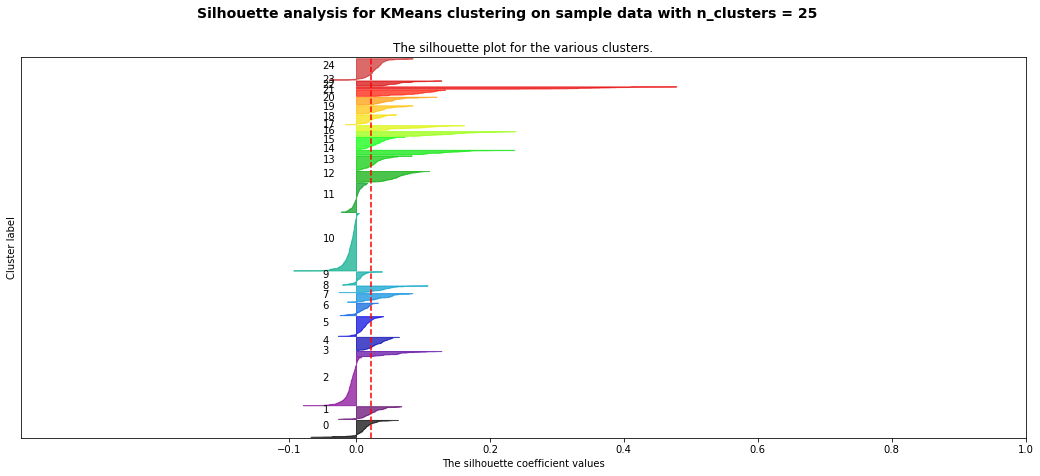

For n_clusters = 30 The average silhouette_score is : 0.0251277424599
For n_clusters = 30 The standard deviation of silhouette_score is : 0.0496963670318
For n_clusters = 30 The min value of silhouette_score is : -0.0937705764835
For n_clusters = 30 The max value of silhouette_score is : 0.478829434062


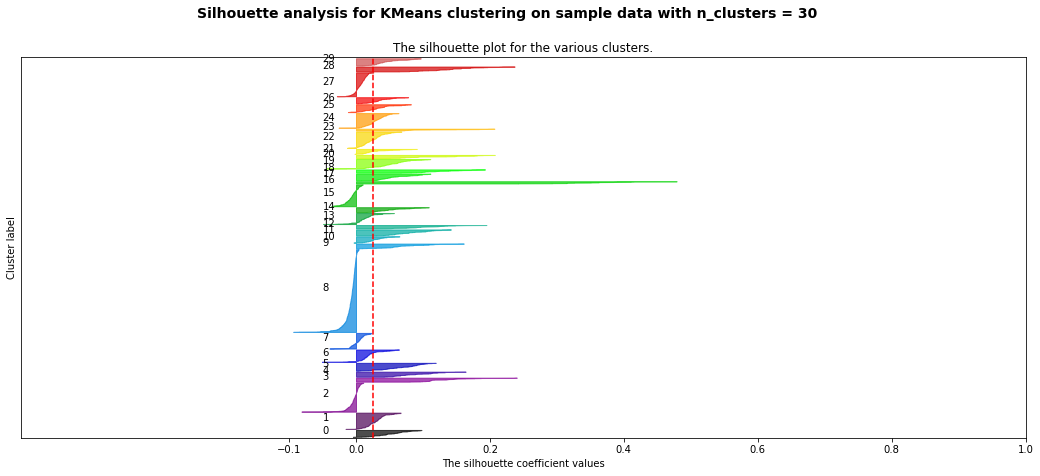

In [29]:
choose_n_clusters(n_clusters, tf_idf_documents.toarray(), random_state)

## LDA

In [30]:
n_clusters = [15, 20, 25, 30]

For n_clusters = 15 The average silhouette_score is : 0.0825112697672
For n_clusters = 15 The standard deviation of silhouette_score is : 0.252747492986
For n_clusters = 15 The min value of silhouette_score is : -0.331341806783
For n_clusters = 15 The max value of silhouette_score is : 0.841908866657


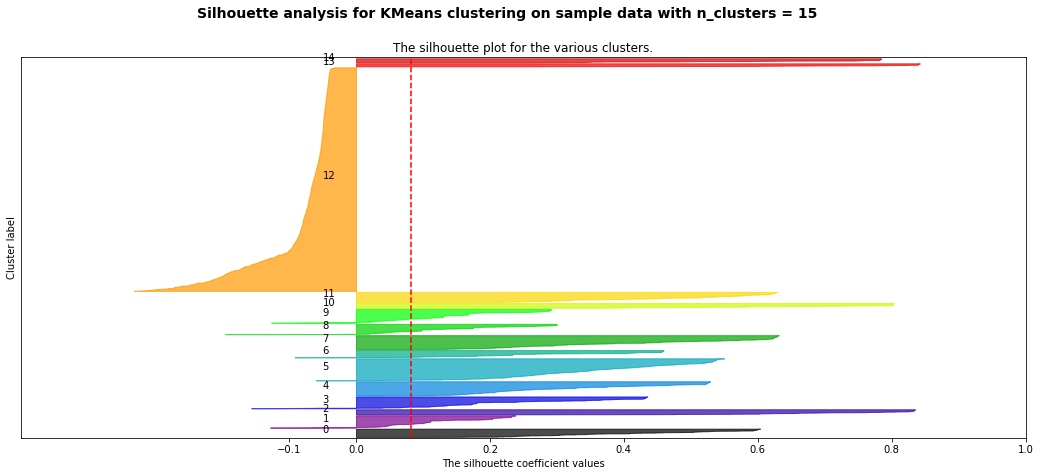

For n_clusters = 20 The average silhouette_score is : 0.123888686631
For n_clusters = 20 The standard deviation of silhouette_score is : 0.28848034432
For n_clusters = 20 The min value of silhouette_score is : -0.356037636903
For n_clusters = 20 The max value of silhouette_score is : 0.834880837662


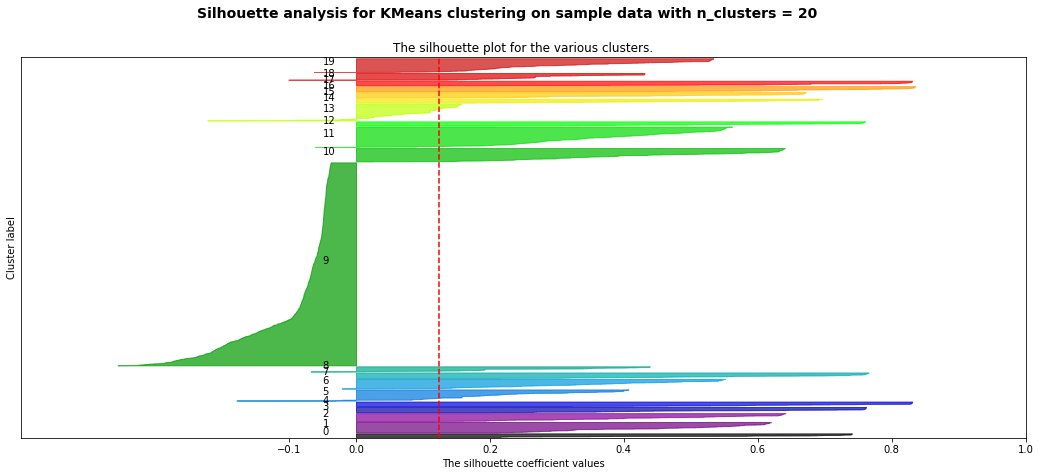

For n_clusters = 25 The average silhouette_score is : 0.159906046404
For n_clusters = 25 The standard deviation of silhouette_score is : 0.296386207538
For n_clusters = 25 The min value of silhouette_score is : -0.38155842114
For n_clusters = 25 The max value of silhouette_score is : 0.837204689273


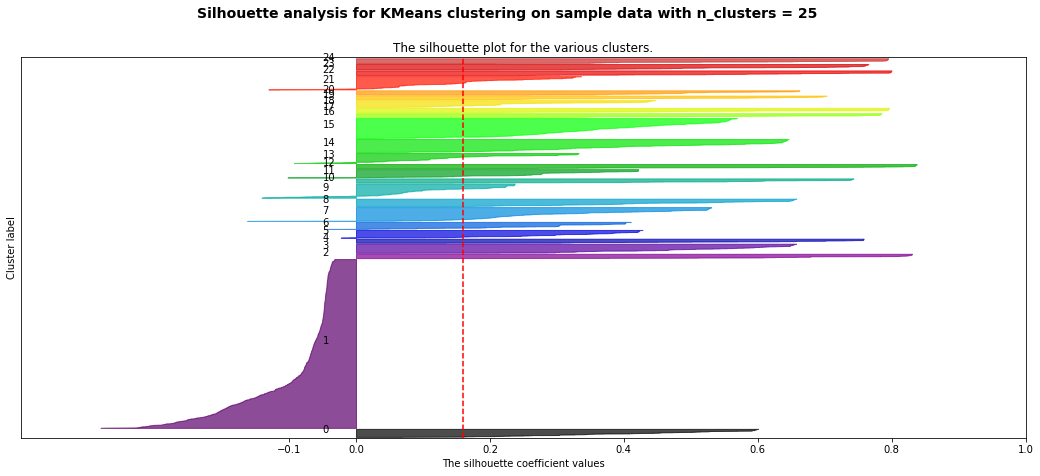

For n_clusters = 30 The average silhouette_score is : 0.191424839067
For n_clusters = 30 The standard deviation of silhouette_score is : 0.342618364182
For n_clusters = 30 The min value of silhouette_score is : -0.373900871649
For n_clusters = 30 The max value of silhouette_score is : 0.904228258869


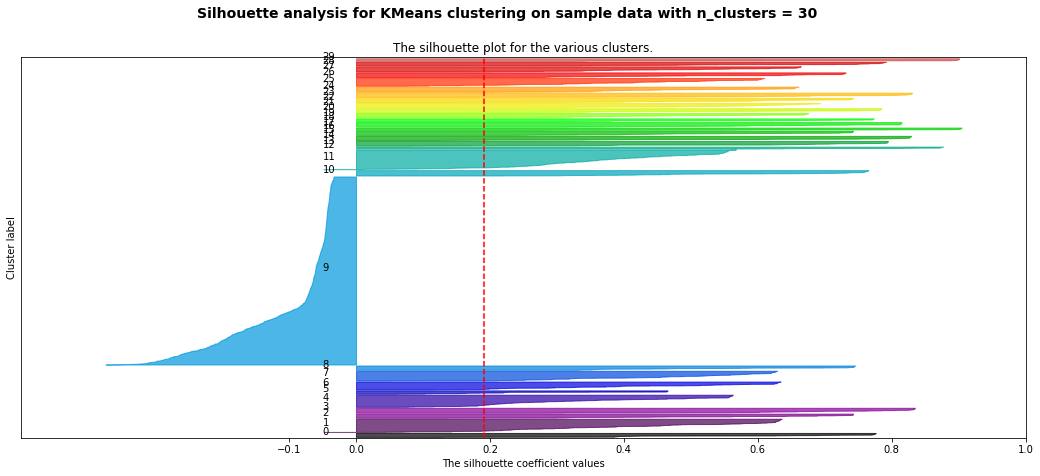

In [31]:
choose_n_clusters(n_clusters, lda_documents, random_state)

## W2V

In [32]:
n_clusters = [15, 20, 25, 30]

For n_clusters = 15 The average silhouette_score is : 0.128304350901
For n_clusters = 15 The standard deviation of silhouette_score is : 0.109923420634
For n_clusters = 15 The min value of silhouette_score is : -0.197708983815
For n_clusters = 15 The max value of silhouette_score is : 0.450925418641


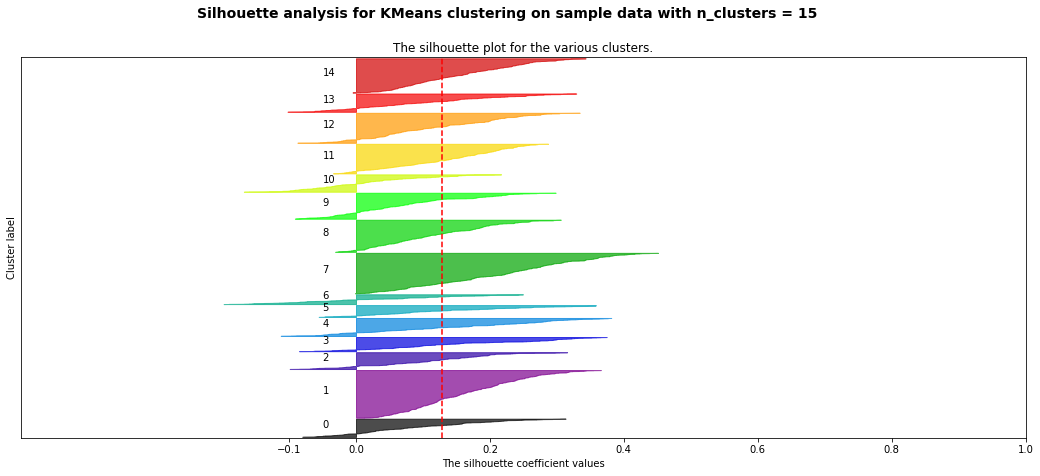

For n_clusters = 20 The average silhouette_score is : 0.125355535264
For n_clusters = 20 The standard deviation of silhouette_score is : 0.11286192769
For n_clusters = 20 The min value of silhouette_score is : -0.172349913174
For n_clusters = 20 The max value of silhouette_score is : 0.405084196127


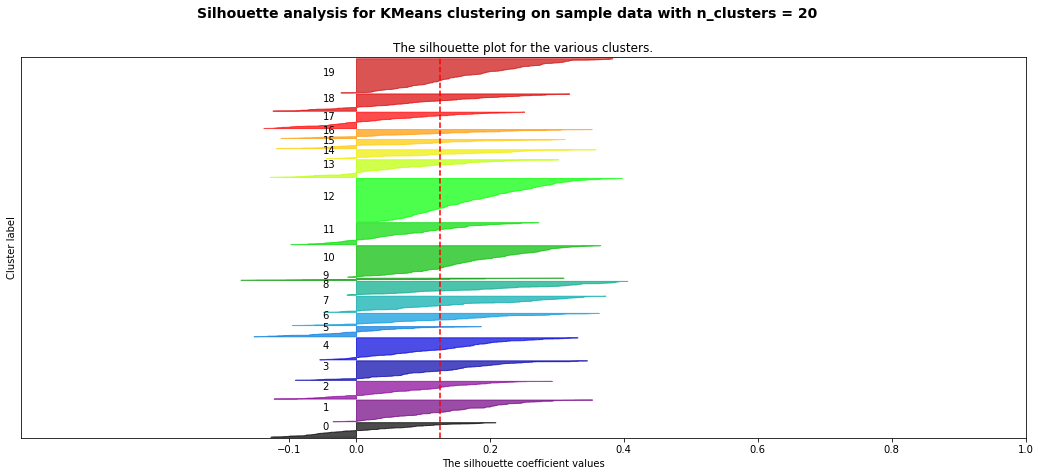

For n_clusters = 25 The average silhouette_score is : 0.116358386311
For n_clusters = 25 The standard deviation of silhouette_score is : 0.107333157988
For n_clusters = 25 The min value of silhouette_score is : -0.177255633266
For n_clusters = 25 The max value of silhouette_score is : 1.0


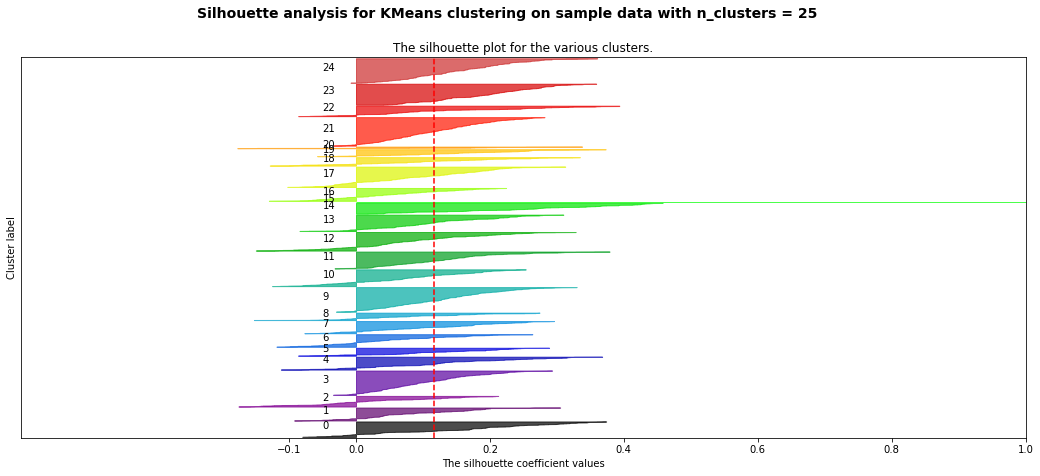

For n_clusters = 30 The average silhouette_score is : 0.115938791696
For n_clusters = 30 The standard deviation of silhouette_score is : 0.101739480384
For n_clusters = 30 The min value of silhouette_score is : -0.159187562015
For n_clusters = 30 The max value of silhouette_score is : 1.0


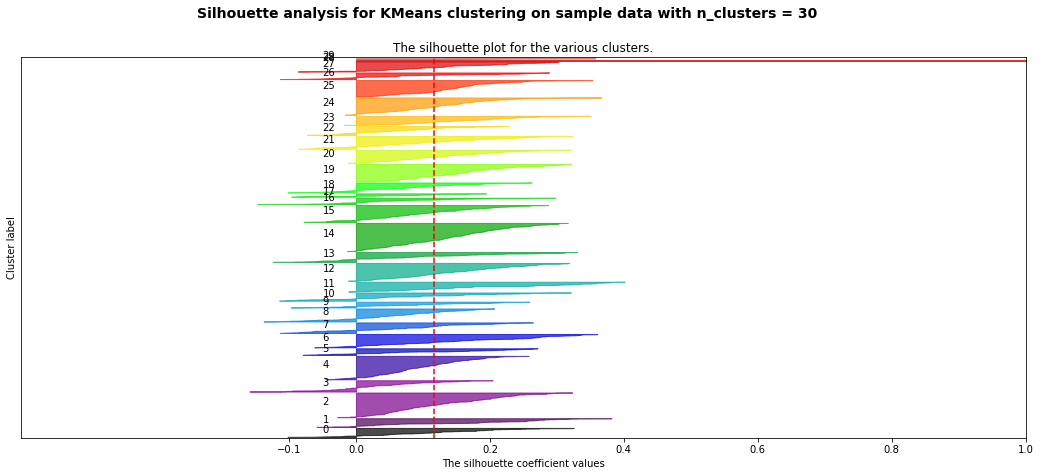

In [33]:
choose_n_clusters(n_clusters, w2v_documents, random_state)

# Other Algorithms

## DBSCAN

## TF-IDF

In [34]:
%%time
db_scan = DBSCAN()

Wall time: 0 ns


In [35]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(tf_idf_documents)

Wall time: 790 ms


## LDA

In [36]:
%%time
db_scan = DBSCAN()

Wall time: 0 ns


In [37]:
%%time
labels_lda_pred = db_scan.fit_predict(lda_documents)

Wall time: 4.21 s


## W2V

In [38]:
%%time
db_scan = DBSCAN()

Wall time: 521 µs


In [39]:
%%time
labels_w2v_pred = db_scan.fit_predict(w2v_documents)

Wall time: 3.07 s


# Metrics calculation

### Confusion matrix

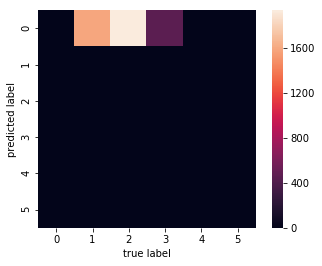

Wall time: 143 ms


In [40]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_tf_idf_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

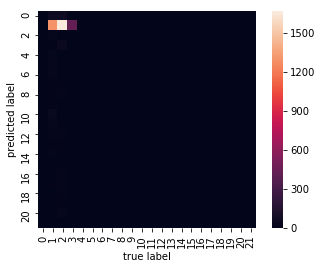

Wall time: 213 ms


In [41]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_lda_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

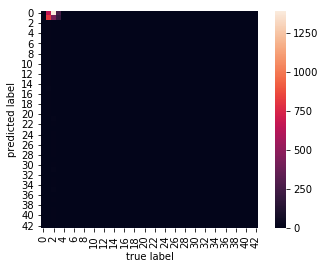

Wall time: 265 ms


In [42]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_w2v_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Other metrics (with/without ground-truth labels)

In [43]:
%%time
metrcs = metrics_report(
    ['db_scan_tf_idf', 'db_scan_lda', 'db_scan_w2v'],
    [tf_idf_documents.toarray(), lda_documents, w2v_documents],
    [labels_tf_idf_pred, labels_lda_pred, labels_w2v_pred],
    labels_true
)

Wall time: 5.67 s


In [44]:
metrcs

,AR,MI,AMI,NMI,SC,CHI
db_scan_tf_idf,-0.001371,0.005551,0.004280,0.024197,-0.020269,5.548810
db_scan_lda,-0.014455,0.043667,0.039706,0.048387,0.013562,30.566163
db_scan_w2v,0.076330,0.102560,0.080518,0.097942,-0.373694,13.860380


## Agglomerative Clustering

## TF-IDF

In [45]:
%%time
aggl_clust = AgglomerativeClustering(n_clusters=20)

Wall time: 530 µs


In [46]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(tf_idf_documents)

Wall time: 756 ms


## LDA

In [47]:
%%time
aggl_clust = AgglomerativeClustering(n_clusters=20)

Wall time: 0 ns


In [48]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(lda_documents)

Wall time: 4.2 s


## W2V

In [49]:
%%time
aggl_clust = AgglomerativeClustering(n_clusters=20)

Wall time: 0 ns


In [50]:
%%time
labels_tf_idf_pred = db_scan.fit_predict(w2v_documents)

Wall time: 3.02 s


# Metrics calculation

### Confusion matrix

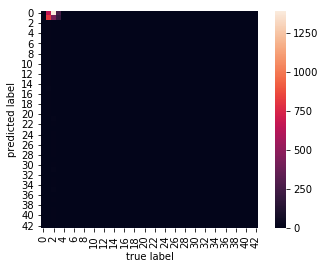

Wall time: 266 ms


In [51]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_tf_idf_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

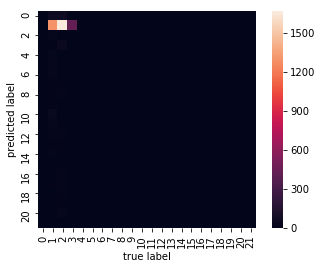

Wall time: 218 ms


In [52]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_lda_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

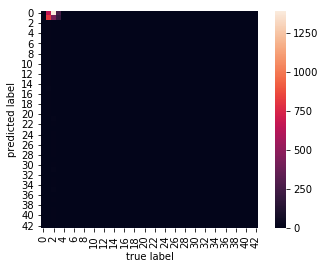

Wall time: 272 ms


In [53]:
%%time
mat = metrics.confusion_matrix(labels_true, labels_w2v_pred)
sns.heatmap(mat.T, square=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Other metrics (with/without ground-truth labels)

In [54]:
%%time
metrcs = metrics_report(
    ['aggl_clust', 'aggl_clust', 'aggl_clust'],
    [tf_idf_documents.toarray(), lda_documents, w2v_documents],
    [labels_tf_idf_pred, labels_lda_pred, labels_w2v_pred],
    labels_true
)

Wall time: 5.73 s


In [55]:
metrcs

,AR,MI,AMI,NMI,SC,CHI
aggl_clust,0.076330,0.102560,0.080518,0.097942,-0.028065,3.918752
aggl_clust,-0.014455,0.043667,0.039706,0.048387,0.013562,30.566163
aggl_clust,0.076330,0.102560,0.080518,0.097942,-0.373694,13.860380
